In [26]:
# project [clustering ]
# customer segmentation using k-means clustering 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [27]:
customer_data=pd.read_csv("Mall_Customers.csv")

In [28]:
customer_data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [29]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [30]:
customer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [31]:
# check missing values
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [32]:
customer_data.drop("CustomerID",axis=1,inplace=True)

In [33]:
customer_data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [34]:
customer_data=pd.get_dummies(customer_data,drop_first=True)

In [35]:
customer_data

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,0
196,45,126,28,0
197,32,126,74,1
198,32,137,18,1


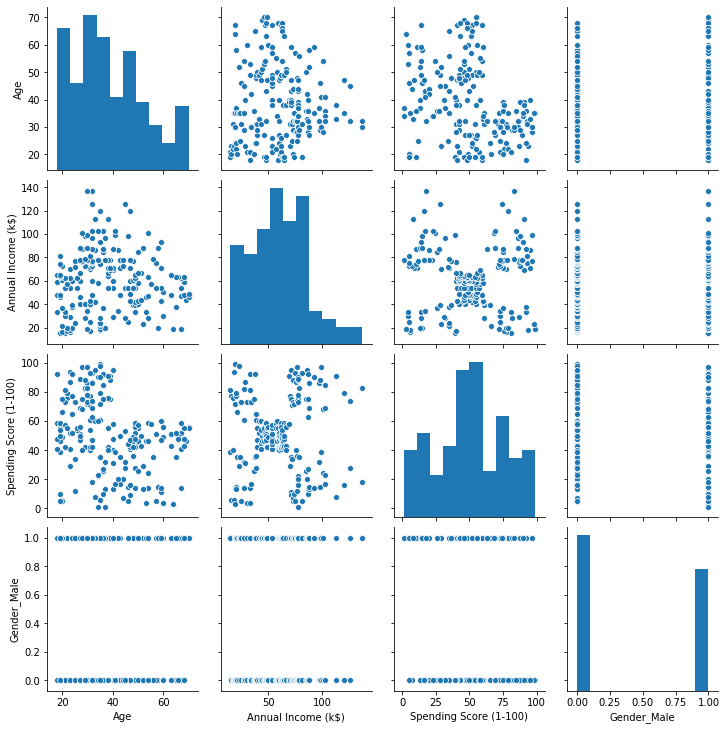

In [36]:
sns.pairplot(customer_data)
# from this graph we indicate that ("Annual Income (k$",'Spending Score (1-100)	') divide data to group 

In [37]:
# choose two features ("Annual Income (k$",'Spending Score (1-100)') 
X=customer_data.iloc[:,[1,2]]

In [38]:
X


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [52]:
X.iloc[:,0]

0       15
1       15
2       16
3       16
4       17
      ... 
195    120
196    126
197    126
198    137
199    137
Name: Annual Income (k$), Length: 200, dtype: int64

In [42]:
# finding wcss value for different number of cluster
wcss=[]
for i in range (1,11):
    km=KMeans(n_clusters=i,init="k-means++",random_state=42)
    km.fit(X)
    wcss.append(km.inertia_)
    print(i,km.inertia_)

1 269981.28
2 181363.59595959596
3 106348.37306211118
4 73679.78903948834
5 44448.45544793371
6 37265.86520484347
7 30241.34361793659
8 25336.946861471864
9 21850.165282585633
10 19634.55462934998


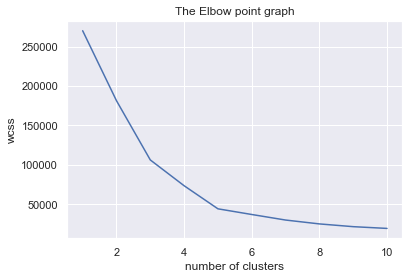

In [44]:
# show this result in graph to get optimum number of clusters 
sns.set()
plt.plot(range(1,11),wcss)
plt.title("The Elbow point graph")
plt.xlabel("number of clusters")
plt.ylabel("wcss")
plt.show()

In [49]:
# result of this graph optimum number of clusters =5
# train model with optimum number of clusters=5
km1=KMeans(n_clusters=5,init="k-means++",random_state=0)
Y=km1.fit_predict(X)
print(Y)

[3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 0 3 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 4 2 0 2 4 2 4 2 0 2 4 2 4 2 4 2 4 2 0 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


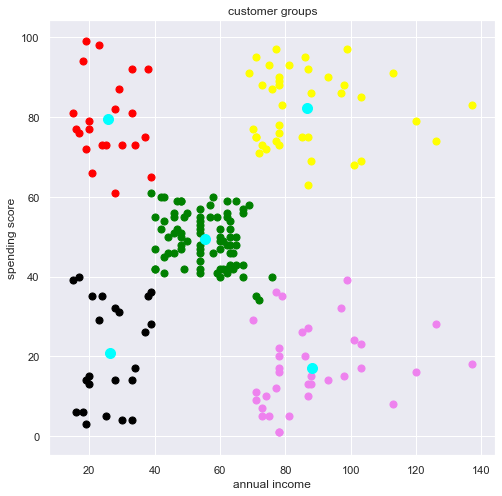

In [55]:
# visualizing all the clusters
# plotting all the clusters and their centroids
plt.figure(figsize=(8,8))
plt.scatter(X.iloc[Y==0,0],X.iloc[Y==0,1],s=50,c="green",label="cluster0")
plt.scatter(X.iloc[Y==1,0],X.iloc[Y==1,1],s=50,c="red",label="cluster1")
plt.scatter(X.iloc[Y==2,0],X.iloc[Y==2,1],s=50,c="yellow",label="cluster2")
plt.scatter(X.iloc[Y==3,0],X.iloc[Y==3,1],s=50,c="black",label="cluster3")
plt.scatter(X.iloc[Y==4,0],X.iloc[Y==4,1],s=50,c="violet",label="cluster4")
plt.scatter(km1.cluster_centers_[:,0],km1.cluster_centers_[:,1],s=100,c="cyan",label="centroids")
plt.title("customer groups")
plt.xlabel("annual income")
plt.ylabel("spending score")
plt.show()



